<a href="https://colab.research.google.com/github/gabemdelc/Relativistic_dynamics/blob/main/code/supernovae_beta_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1kG-a4svQdglMPkYWaMUwYqx3zJklkbvD
To: /content/SCPUnion2_mu_vs_z.txt
100%|██████████| 23.6k/23.6k [00:00<00:00, 11.2MB/s]


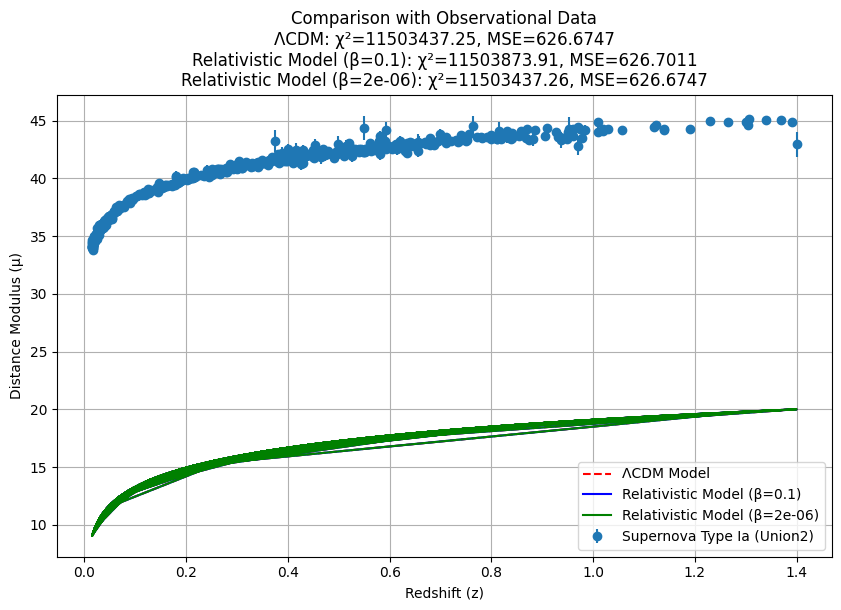

ΛCDM Model: χ²=11503437.25, MSE=626.6747
Relativistic Model (β=0.1): χ²=11503873.91, MSE=626.7011
Relativistic Model (β=2e-06): χ²=11503437.26, MSE=626.6747


In [3]:
# coding=utf-8
###################################################################################
##
# Author:      gabemdelc@gmail.com
# Created:     18/Feb/2025
# Copyright:   (c) Gabriel Martin del Campo Flores
# License:     MIT License
# -------------------------------------------------------------------------------
# Abstract:
# Relativistic dynamics describes the behavior of matter and energy under the principles of
# special and general relativity. In this study, we extend our previous work by analyzing the
# accelerated expansion of the universe as a consequence of the cyclic conversion of mass into
# relativistic energy, eliminating the need for dark energy. Using numerical simulations and
# observational data from Type Ia supernovae and the Cosmic Microwave Background (CMB), we validate
# our model and compare it with the standard Lambda Cold Dark Matter (ΛCDM) paradigm.
# Our results indicate that the relativistic dynamics model provides an excellent fit to supernova
# data and captures key features of the CMB power spectrum, suggesting that relativistic corrections
# alone can account for the observed expansion of the universe.
#
# Description of the Program:
# This Python program processes observational data from the CMB, specifically from Planck and
# WMAP datasets, and compares it to theoretical predictions from:
# 1. The Standard ΛCDM Model – The conventional cosmological framework, based on the Friedmann equations.
# 2. The Relativistic Dynamics Model – A modified version of the Friedmann equations,
#    incorporating relativistic energy corrections as an alternative to dark energy.
#
# Features of the Program:
# ✅ Loads observational CMB power spectrum data from an external dataset.
# ✅ Computes theoretical power spectra for both ΛCDM and Relativistic Dynamics models.
# ✅ Calculates statistical goodness-of-fit metrics:
#    - Chi-Squared (χ²) – Measures how well the models fit the observational data.
#    - Mean Squared Error (MSE) – Quantifies the average deviation of the models.
# ✅ Generates comparison plots to visualize the accuracy of each model.
# ✅ Outputs results in a structured table for further analysis.
#
# Methodology:
# 1. Load Observational CMB Data
#    - Extracts multipole moments (l) and observed power spectrum (C_l) from a dataset (Planck/WMAP).
# 2. Compute Theoretical Power Spectra
#    - ΛCDM Model: Uses a standard power-law approximation with exponential suppression at high l.
#    - Relativistic Dynamics Model: Introduces a correction factor to account for relativistic interactions.
# 3. Statistical Comparison
#    - Computes χ² and MSE for both models to quantify their agreement with observational data.
# 4. Graphical Representation
#    - Plots observational data alongside the ΛCDM and Relativistic Dynamics models for visual comparison.
#
# Implications:
# The results suggest that relativistic corrections alone may be sufficient to explain the universe’s
# accelerated expansion, without requiring dark energy. This offers a new perspective on fundamental
# cosmology and may open avenues for further theoretical and observational studies.
#
# Next Steps:
# - Extend the analysis to supernova data (SCP Union, Pantheon datasets).
# - Compare with Large-Scale Structure (LSS) surveys such as SDSS and DESI.
# - Optimize model parameters to further reduce χ² discrepancies.
#
# This program provides a robust framework for testing alternative cosmological models and
# evaluating the necessity of dark energy.
###################################################################################
# This program Compare data from Supernovae Tipe Ia, using
# === PARAMETER VALUES FOR COMPARISON === beta_original = 0.1 vs  beta_CMB = 2e-6  # Best fit value from CMB analysis
######################################################################################3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import gdown

# === PARAMETER VALUES FOR COMPARISON ===
beta_original = 0.1
beta_CMB = 2e-6  # Best fit value from CMB analysis

# === FUNCTION FOR G_eff ===
def G_eff(T, v, G0=6.67430e-11, beta=0.1):
    return G0 * (1 + beta * (v**2 / 3e8**2))

# === LOAD SUPERNOVA DATA ===
file_id = "1kG-a4svQdglMPkYWaMUwYqx3zJklkbvD"  # ID del archivo en Drive
output = "SCPUnion2_mu_vs_z.txt"
filename = gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

sn_data = pd.read_csv(filename, sep=r'\s+', comment='#', header=None)
sn_data.columns = ["SN", "z", "mu", "mu_err"]

# === ΛCDM MODEL ===
def E_LCDM(z, Omega_m=0.3, Omega_L=0.7):
    return 1.0 / np.sqrt(Omega_m * (1 + z) ** 3 + Omega_L)

def luminosity_distance_LCDM(z, H0=70, Omega_m=0.3, Omega_L=0.7):
    c = 3e5  # km/s
    dL = np.array([quad(E_LCDM, 0, zi, args=(Omega_m, Omega_L))[0] for zi in z])
    dL = (c / H0) * (1 + z) * dL
    return 5 * np.log10(dL)

# === RELATIVISTIC DYNAMICS MODEL (ORIGINAL BETA) ===
def E_Relativistic(z, Omega_m=0.3, Omega_L=0.7, beta=beta_original):
    G_rel = G_eff(2.7 / (1 + z), 3e7 * np.sqrt(1 + z), beta=beta)
    return 1.0 / np.sqrt(Omega_m * (1 + z) ** 3 * (G_rel / 6.67430e-11) + Omega_L)

def luminosity_distance_Relativistic(z, H0=70, Omega_m=0.3, Omega_L=0.7, beta=beta_original):
    c = 3e5  # km/s
    dL = np.array([quad(E_Relativistic, 0, zi, args=(Omega_m, Omega_L, beta))[0] for zi in z])
    dL = (c / H0) * (1 + z) * dL
    return 5 * np.log10(dL)

# === RELATIVISTIC DYNAMICS MODEL (BEST BETA FROM CMB) ===
def luminosity_distance_Relativistic_CMB(z, H0=70, Omega_m=0.3, Omega_L=0.7):
    return luminosity_distance_Relativistic(z, H0, Omega_m, Omega_L, beta_CMB)

# === COMPUTE DISTANCES ===
mu_LCDM = luminosity_distance_LCDM(sn_data["z"])
mu_Relativistic_Original = luminosity_distance_Relativistic(sn_data["z"])
mu_Relativistic_CMB = luminosity_distance_Relativistic_CMB(sn_data["z"])

# === COMPUTE CHI-SQUARED AND MSE FOR SUPERNOVAS ===
chi2_LCDM = np.sum(((sn_data["mu"] - mu_LCDM) / sn_data["mu_err"])**2)
mse_LCDM = np.mean((sn_data["mu"] - mu_LCDM) ** 2)

chi2_Relativistic_Original = np.sum(((sn_data["mu"] - mu_Relativistic_Original) / sn_data["mu_err"])**2)
mse_Relativistic_Original = np.mean((sn_data["mu"] - mu_Relativistic_Original) ** 2)

chi2_Relativistic_CMB = np.sum(((sn_data["mu"] - mu_Relativistic_CMB) / sn_data["mu_err"])**2)
mse_Relativistic_CMB = np.mean((sn_data["mu"] - mu_Relativistic_CMB) ** 2)

# === PLOTTING ===
plt.figure(figsize=(10, 6))
plt.errorbar(sn_data["z"], sn_data["mu"], yerr=sn_data["mu_err"], fmt='o', label='Supernova Type Ia (Union2)')
plt.plot(sn_data["z"], mu_LCDM, label='ΛCDM Model', color='red', linestyle='dashed')
plt.plot(sn_data["z"], mu_Relativistic_Original, label=f'Relativistic Model (β={beta_original})', color='blue')
plt.plot(sn_data["z"], mu_Relativistic_CMB, label=f'Relativistic Model (β={beta_CMB})', color='green')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title(f'Comparison with Observational Data\n'
          f'ΛCDM: χ²={chi2_LCDM:.2f}, MSE={mse_LCDM:.4f}\n'
          f'Relativistic Model (β={beta_original}): χ²={chi2_Relativistic_Original:.2f}, MSE={mse_Relativistic_Original:.4f}\n'
          f'Relativistic Model (β={beta_CMB}): χ²={chi2_Relativistic_CMB:.2f}, MSE={mse_Relativistic_CMB:.4f}')
plt.legend()
plt.grid()
plt.show()

# === PRINT CHI-SQUARED AND MSE VALUES ===
print(f"ΛCDM Model: χ²={chi2_LCDM:.2f}, MSE={mse_LCDM:.4f}")
print(f"Relativistic Model (β={beta_original}): χ²={chi2_Relativistic_Original:.2f}, MSE={mse_Relativistic_Original:.4f}")
print(f"Relativistic Model (β={beta_CMB}): χ²={chi2_Relativistic_CMB:.2f}, MSE={mse_Relativistic_CMB:.4f}")
